<a href="https://colab.research.google.com/github/anitashar/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/ANITA_SHARMA_Copy_of_LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-11-06 02:07:23--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.112.53
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.112.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  35.1MB/s    in 6.2s    

2019-11-06 02:07:30 (31.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
##### YOUR CODE HERE #####

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
aisles=pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
departments=pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [0]:
order_products__prior=pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
order_products__train=pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [0]:
orders=pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
products=pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
# # concatenate them together

order_products=pd.concat([order_products__prior, order_products__train])
print(order_products.shape)
order_products.head()



(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
# merge these into a single dataframe
merged = pd.merge( order_products[[ 'order_id', 'product_id']], 
                  products[[ 'product_id', 'product_name']],
                  how = 'inner',
                  on = 'product_id')
merged.tail(10)

,order_id,product_id,product_name
33819096,3400803,23624,Flatbread Pizza All Natural
33819097,774603,25383,Chocolate Go Bites
33819098,1351798,49540,Pure Squeezed Lemonade
33819099,1832341,45971,12 Inch Taper Candle White
33819100,2169250,3718,Wasabi Cheddar Spreadable Cheese
33819101,2269288,27499,Non-Dairy Coconut Seven Layer Bar
33819102,2507248,27499,Non-Dairy Coconut Seven Layer Bar
33819103,2271346,37703,Ultra Sun Blossom Liquid 90 loads Fabric Enhan...
33819104,3004244,43725,Sweetart Jelly Beans
33819105,3376312,36233,Water With Electrolytes


In [0]:
print( merged[ 'product_name'].value_counts()[:10] )

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64


## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
#  Let's create a simple table.

myindex=['John Smith', 'Jane Doe', 'Mary Johnson']
mycolumns=['treatmenta', 'treatmentb']

table1 = pd.DataFrame(
            [[np.nan, 2],
             [16, 11],
             [3, 1]],
          columns=mycolumns,
        index=myindex
)

In [27]:
# This is an example of 'wide' format:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [28]:
# Exactly the same information can be displayed by transposing the table. 
# (this is also another form of 'wide' format)
table2 = table1.T
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [29]:
# First, get the column names as a list.
list(table1.columns)
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [30]:
# Now get the index values as another list.
table1.index.tolist()


['John Smith', 'Jane Doe', 'Mary Johnson']

In [31]:
# For table 1, convert the index into a column using the `reset_index` method.
table1=table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [33]:
# Convert the table from 'wide' to 'tidy' format using the `melt` method.
tidy= table1.melt(id_vars='index',value_vars=['treatmenta','treatmentb'])
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [35]:
# rename the columns

tidy =tidy.rename(columns={
                   'index':'name',
                   'variable':'trt',
                   'value':'result'
                   })
# shorten the `trt` values
tidy.trt = tidy.trt.str.replace('treatment', '')
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [0]:
# assignment
# #table2 --> tidy
#dataframe we need
table1 = pd.DataFrame(
    [[np.nan,2],[16,11],
     [3,1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

In [38]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [39]:

#this is a 'wide' format transposed
table2 = table1.T
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
#identify the column and index
columns = ['John Smith', 'Jane Doe', 'Mary Johnson']
index = ['treatmenta', 'treatmentb']

In [40]:
#convert coulmns to list
table2.columns.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [41]:
#convert index to list
#list of tolist will give same result
list(table2.index)
table2.index.tolist()

['treatmenta', 'treatmentb']

In [42]:
#convert the index into columns
table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [44]:
#melt
tidy = table2.melt(id_vars='index', value_vars=['John Smith', 'Jane Doe', 'Mary Johnson'])
tidy

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [45]:
#create a dictoary to repace the column names
tidy = tidy.rename(columns={
    'index': 'trt',
    'variable': 'name',
    'value': 'result'
})
tidy

,trt,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [46]:
#.str gets rid of the excessive treatment word 
tidy.trt = tidy.trt.str.replace('treatment', '')
tidy

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


In [47]:
#tidy --> table2
#need to reverse it using pivot method
#why is it in a differnet order?
wide = tidy.pivot_table(index = 'trt', columns= 'name'  , values='result')
wide

name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


In [0]:
#assignment
# Load seaborn's flights dataset by running the cell below. 
# Then create a pivot table showing the number of passengers by month and year. 
# Use year for the index and month for the columns. 
# You've done it right if you get:
#  112 passengers for January 1949  
#  432 passengers for December 1960
flights = sns.load_dataset('flights')
print(flights.shape)
flights.head()

(144, 3)


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [0]:
flights.pivot_table(values='passengers', index = 'year', columns = 'month')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


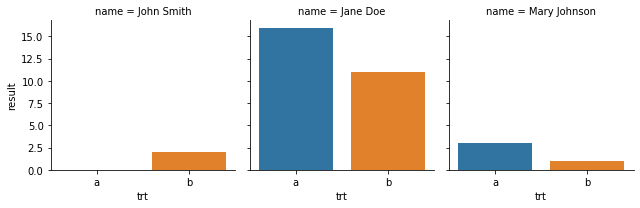

In [48]:
##### YOUR CODE HERE #####

# replicating the code again
# Plot this using seaborn
sns.catplot(data=tidy, x='trt', y='result', col='name', kind='bar', height=3);


In [0]:
#  Concatenating time-series datasets from Chicago
# Here's some data about Chicago bikesharing.
source_path='https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/Divvy_Trips_dataset/'
q1_path=source_path + 'Divvy_Trips_2015-Q1.csv'
q2_path=source_path + 'Divvy_Trips_2015-Q2.csv'
q3_path=source_path + 'Divvy_Trips_2015-Q3.csv'
q4_path=source_path + 'Divvy_Trips_2015-Q4.csv'

In [51]:
# Let's take a look at the first quarter.

q1 = pd.read_csv(q1_path)
print(q1.shape)
q1.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4607895,3/12/2015 7:11,3/12/2015 7:16,2058,322,75,Canal St & Jackson Blvd,284,Michigan Ave & Jackson Blvd,Subscriber,Male,1960.0
1,4467889,1/22/2015 17:07,1/22/2015 17:10,2499,178,16,Wood St & North Ave,58,Marshfield Ave & Cortland St,Subscriber,Male,1977.0
2,4644042,3/16/2015 10:30,3/16/2015 10:36,369,346,91,Clinton St & Washington Blvd,100,Orleans St & Merchandise Mart Plaza,Subscriber,Male,1986.0
3,4598015,3/10/2015 17:19,3/10/2015 17:36,857,1048,134,Peoria St & Jackson Blvd,128,Damen Ave & Chicago Ave,Subscriber,Male,1984.0
4,4467863,1/22/2015 17:02,1/22/2015 17:12,2241,611,52,Michigan Ave & Lake St,192,Canal St & Adams St,Subscriber,Male,1963.0


In [52]:
# how about the second quarter?
q2 = pd.read_csv(q2_path)
print(q2.shape)
q2.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,5019758,5/2/2015 10:05,5/2/2015 10:14,72,545,223,Clifton Ave & Armitage Ave,349,Halsted St & Wrightwood Ave,Subscriber,Male,1978.0
1,4874907,4/15/2015 17:21,4/15/2015 17:26,2683,304,197,Michigan Ave & Madison St,174,Canal St & Madison St,Subscriber,Male,1964.0
2,5149598,5/14/2015 6:23,5/14/2015 6:37,3404,806,273,Michigan Ave & 16th St,192,Canal St & Adams St,Subscriber,Male,1982.0
3,5127077,5/12/2015 6:33,5/12/2015 6:55,2374,1342,305,Western Ave & Division St,24,Fairbanks Ct & Grand Ave,Subscriber,Female,1989.0
4,4776193,4/4/2015 19:16,4/4/2015 19:39,2848,1432,85,Michigan Ave & Oak St,304,Broadway & Waveland Ave,Subscriber,Male,1978.0


In [53]:
# Do they have exactly the same columns?
print(q1.columns)
print(q2.columns)

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')
Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')


In [54]:

# Let's define a function to check if they're REALLY equal.
def diff_check(list1, list2):
  diff = list(set(list1) - set(list2))
  print('difference is:', diff)
  
diff_check(q1.columns, ['from_station_name', 'tripduration', 'from_station_id']
          )

difference is: ['gender', 'birthyear', 'to_station_id', 'starttime', 'to_station_name', 'usertype', 'bikeid', 'trip_id', 'stoptime']


In [55]:
# Now we're sure they're equal, let's concatenate them.
q1_q2=pd.concat([q1,q2],axis=0)
q1_q2.shape

(2000, 12)

In [57]:
# Now add quarters 3 and 4, as well.
q3 = pd.read_csv(q3_path)

q4 = pd.read_csv(q4_path)
full_year=pd.concat([q1,q2,q3,q4],axis=0)
full_year.shape

(4000, 12)

In [0]:
#  Merging datasets about counties
# Get some population data about counties from the Census Bureau
source1='https://raw.githubusercontent.com/austinlasseter/dash-virginia-counties/master/resources/acs2017_county_data.csv'


In [77]:
# Read that into Pandas, and check out 5 rows.
census=pd.read_csv(source1)
census.sample(5)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1160,22095,Louisiana,St. John the Baptist Parish,43565,21285,22280,5.8,36.4,55.4,0.0,0.9,0.0,31950,53628,2953,23380,1031,17.9,25.7,28.9,16.5,25.0,11.8,17.8,88.0,7.6,0.3,0.8,1.7,1.6,28.5,19280,83.4,12.4,4.1,0.1,7.3
1502,29039,Missouri,Cedar County,13862,6883,6979,2.0,95.0,0.0,0.0,0.2,0.2,10451,35930,3245,20228,1857,22.6,27.0,29.0,21.8,19.7,14.2,15.3,85.8,7.2,0.0,2.4,0.8,3.8,25.5,4908,72.8,16.8,9.9,0.4,11.2
1435,28069,Mississippi,Kemper County,10082,4970,5112,1.7,34.2,60.3,3.7,0.0,0.0,8026,27016,3197,15790,1897,31.8,46.5,22.3,21.2,14.3,18.8,23.4,81.0,11.6,0.0,2.6,3.1,1.7,32.2,3538,66.5,24.7,8.7,0.0,6.8
2730,48415,Texas,Scurry County,17346,9446,7900,39.7,53.6,4.5,0.1,0.2,0.0,12385,54565,5212,24140,1725,12.8,17.2,23.7,17.4,23.3,20.7,15.0,82.2,12.8,0.3,1.0,2.0,1.6,16.6,6772,77.0,13.1,9.8,0.2,4.6
2920,51570,Virginia,Colonial Heights city,17582,8108,9474,5.5,74.3,13.1,0.5,3.8,0.0,13157,50952,4104,27608,1491,13.2,19.7,36.4,16.6,27.0,8.2,11.8,86.2,6.5,1.0,2.0,2.1,2.2,21.7,7587,73.4,22.8,3.4,0.4,10.2


In [78]:
# What are all the columns?
census.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [79]:
# Let's restrict that to just a few columns, for a simple analysis about commute times
commute=census[['CountyId', 'State', 'County', 'MeanCommute']]
commute.sample(4)

,CountyId,State,County,MeanCommute
1641,30087,Montana,Rosebud County,12.8
35,1071,Alabama,Jackson County,25.7
2464,47073,Tennessee,Hawkins County,25.3
1645,30095,Montana,Stillwater County,24.1


In [80]:
# What's the average commute in the USA?
commute['MeanCommute'].mean()

23.47453416149071

In [0]:
# Now let's augment that with some outside data from USDA.
source2='https://github.com/austinlasseter/dash-virginia-counties/blob/master/resources/ruralurbancodes2013.xls?raw=true'


In [82]:
# Take a look at that new data.
usda=pd.read_excel(source2)
usda.sample(5)

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
3101,55105,WI,Rock County,160331,3,Metro - Counties in metro areas of fewer than ...
1278,26095,MI,Luce County,6631,7,"Nonmetro - Urban population of 2,500 to 19,999..."
1085,21185,KY,Oldham County,60316,1,Metro - Counties in metro areas of 1 million p...
2772,48499,TX,Wood County,41964,6,"Nonmetro - Urban population of 2,500 to 19,999..."
388,13003,GA,Atkinson County,8375,9,"Nonmetro - Completely rural or less than 2,500..."


In [83]:
# What are those RUCC codes all about?

usda.groupby('RUCC_2013')[['Description']].min()

,Description
RUCC_2013,
1,Metro - Counties in metro areas of 1 million p...
2,"Metro - Counties in metro areas of 250,000 to ..."
3,Metro - Counties in metro areas of fewer than ...
4,"Nonmetro - Urban population of 20,000 or more,..."
5,"Nonmetro - Urban population of 20,000 or more,..."
6,"Nonmetro - Urban population of 2,500 to 19,999..."
7,"Nonmetro - Urban population of 2,500 to 19,999..."
8,"Nonmetro - Completely rural or less than 2,500..."
9,"Nonmetro - Completely rural or less than 2,500..."


In [84]:
# Let's shrink that USDA data to just the columns we need.
usda=usda[['FIPS', 'RUCC_2013']]
usda.head()

,FIPS,RUCC_2013
0,1001,2
1,1003,3
2,1005,6
3,1007,1
4,1009,1


In [0]:
# commute.head(2)
# commute.rename(columns={'CountyId':'FIPS'})

In [86]:
# Let's merge that with our census data about commute times.
metro_commute=pd.merge(commute,usda,how='left',left_on='CountyId',right_on='FIPS')
metro_commute.sample(3)

,CountyId,State,County,MeanCommute,FIPS,RUCC_2013
1289,26117,Michigan,Montcalm County,30.0,26117.0,2.0
1770,33013,New Hampshire,Merrimack County,26.3,33013.0,4.0
560,16019,Idaho,Bonneville County,19.2,16019.0,3.0


In [87]:
# Is there any difference in commutes by rural-urban designation?

metro_commute[metro_commute['RUCC_2013']==1]['MeanCommute'].mean()

29.51334745762712

In [88]:
# what about rural?
metro_commute[metro_commute['RUCC_2013']==5]['MeanCommute'].mean()

18.686956521739138

In [93]:
# compare means all in one blow using `groupby`
drivetimes=metro_commute.groupby('RUCC_2013')[['MeanCommute']].mean()
drivetimes

,MeanCommute
RUCC_2013,
1.0,29.513347
2.0,24.721066
3.0,22.864499
4.0,22.332258
5.0,18.686957
6.0,23.877013
7.0,19.532488
8.0,25.707727
9.0,20.113679


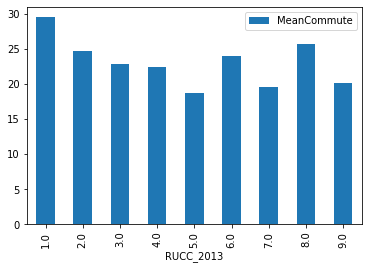

In [95]:
# Display that using the Pandas plotting function.
drivetimes.plot(kind='bar');

In [96]:
#  Instacart Dataset: pd.concat and pd.merge
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-11-10 01:42:48--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.36.190
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.36.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  35.8MB/s    in 6.2s    

2019-11-10 01:42:55 (31.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [97]:
# bash command: de-compress the tarball file (similar to `unzip`)
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [98]:
# bash command: navigate into the new folder.
# Percent sign == "magic" command which changes the underlying state (i.e., new current working directory).
%cd instacart_2017_05_01/

/content/instacart_2017_05_01/instacart_2017_05_01


In [99]:
# bash command: list the contents of that folder.
!ls

aisles.csv	 order_products__prior.csv  orders.csv
departments.csv  order_products__train.csv  products.csv


In [100]:

#  display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)
display(example)

In [102]:
#  CSV filenames
!ls -lh

total 681M
-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


In [103]:
# Read in the aisles dataset
aisles=pd.read_csv('aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [107]:
# Read in the departments dataset
departments=pd.read_csv('departments.csv')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [109]:
# order_products__prior
order_products__prior=pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.sample(2)

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
20912803,2206027,22828,6,1
15180933,1601896,12919,4,1


In [110]:
# order_products__train
order_products__train=pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.sample(2)

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
280745,684020,21137,7,1
579812,1425017,47144,8,1


In [112]:
#  orders
orders=pd.read_csv('orders.csv')
orders.sample(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
828952,2153897,49844,prior,23,4,18,16.0
1506851,2463485,90545,prior,5,3,20,3.0
3378794,3230904,203607,prior,4,1,18,2.0


In [115]:
# products.
products=pd.read_csv('products.csv')
products.sample(2)

,product_id,product_name,aisle_id,department_id
32526,32527,Cedar & Juniper Stick Deodorant,80,11
35625,35626,Vegan Honey Mustard Dressing,89,13


In [0]:
# pick the columns--col filter
cols=['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day']
orders=orders[cols]

In [118]:
# row filter
condition=(orders['user_id']==1)
condition

0           True
1           True
2           True
3           True
4           True
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Name: user_id, Length: 3421083, dtype: bool

In [119]:
# applying condition on orders dataframe
orders[condition]

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7
2,1,473747,3,3,12
3,1,2254736,4,4,7
4,1,431534,5,4,15
5,1,3367565,6,2,7
6,1,550135,7,1,9
7,1,3108588,8,1,14
8,1,2295261,9,1,16
9,1,2550362,10,4,8


In [120]:
# complex condition

condition= (orders['user_id']==1)& (orders['order_number']<=2)
condition

0           True
1           True
2          False
3          False
4          False
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Length: 3421083, dtype: bool

In [121]:
orders[condition]

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7


In [0]:
orders_subset= orders[condition]

In [123]:
print(order_products__prior.shape)
print(order_products__train.shape)

(32434489, 4)
(1384617, 4)


In [124]:
order_products=pd.concat([order_products__prior,order_products__train])
order_products.shape

(33819106, 4)

In [127]:
condition=(order_products['order_id']==2539329) | (order_products['order_id']==2398795)
condition

0          False
1          False
2          False
3          False
4          False
           ...  
1384612    False
1384613    False
1384614    False
1384615    False
1384616    False
Name: order_id, Length: 33819106, dtype: bool

In [0]:
columns=['order_id','add_to_cart','product_id']

In [131]:
# loc
orders_subsets_subset= order_products.loc[condition,columns]
orders_subsets_subset

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,order_id,add_to_cart,product_id
22742744,2398795,NaN,196
22742745,2398795,NaN,10258
22742746,2398795,NaN,12427
22742747,2398795,NaN,13176
22742748,2398795,NaN,26088
22742749,2398795,NaN,13032
24076664,2539329,NaN,196
24076665,2539329,NaN,14084
24076666,2539329,NaN,12427
24076667,2539329,NaN,26088


In [134]:
print(orders_subsets_subset.shape)
orders_subset.shape

(11, 3)


(2, 5)

In [135]:
print(orders_subsets_subset.columns)
print(orders_subset.columns)

Index(['order_id', 'add_to_cart', 'product_id'], dtype='object')
Index(['user_id', 'order_id', 'order_number', 'order_dow',
       'order_hour_of_day'],
      dtype='object')


In [137]:
merged = pd.merge(orders_subset,orders_subsets_subset,on='order_id',how='inner')
merged.sample(3)

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart,product_id
10,1,2398795,2,3,7,NaN,13032
9,1,2398795,2,3,7,NaN,26088
2,1,2539329,1,2,8,NaN,12427


In [138]:
final = pd.merge(merged,products[['product_id','product_name']],on='product_id',how='inner')
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart,product_id,product_name
0,1,2539329,1,2,8,NaN,196,Soda
1,1,2398795,2,3,7,NaN,196,Soda
2,1,2539329,1,2,8,NaN,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,NaN,12427,Original Beef Jerky
4,1,2398795,2,3,7,NaN,12427,Original Beef Jerky
5,1,2539329,1,2,8,NaN,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,NaN,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,NaN,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,NaN,10258,Pistachios
9,1,2398795,2,3,7,NaN,13176,Bag of Organic Bananas


In [139]:
display(example)

In [0]:
# melt & pivot
product_names=['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']


In [141]:
condition = products['product_name'].isin(product_names)
products=products[condition]
products

,product_id,product_name,aisle_id,department_id
9291,9292,Half And Half Ultra Pasteurized,84,16
30667,30668,Half Baked Frozen Yogurt,37,1


In [142]:
froyo_cream = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))
print(froyo_cream.shape)
froyo_cream.head()

(5978, 4)


,product_id,product_name,order_id,order_hour_of_day
0,9292,Half And Half Ultra Pasteurized,64,16
1,9292,Half And Half Ultra Pasteurized,1883,11
2,9292,Half And Half Ultra Pasteurized,5625,9
3,9292,Half And Half Ultra Pasteurized,7765,14
4,9292,Half And Half Ultra Pasteurized,7906,9


In [144]:
print(product_names)
froyo = froyo_cream[froyo_cream['product_name']==product_names[0]]
cream = froyo_cream[froyo_cream['product_name']==product_names[1]]
print(froyo.shape)
print(cream.shape)




['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']
(2983, 4)
(2995, 4)


In [145]:
cream['order_hour_of_day'].value_counts().sort_index()

0       6
1       1
2       1
4       1
5       4
6      25
7      95
8     323
9     480
10    429
11    292
12    200
13    213
14    215
15    222
16    218
17    111
18     56
19     28
20     32
21     23
22     12
23      8
Name: order_hour_of_day, dtype: int64

In [150]:
cream_percents=cream['order_hour_of_day'].value_counts(normalize=True).sort_index()
cream_percents

0     0.002003
1     0.000334
2     0.000334
4     0.000334
5     0.001336
6     0.008347
7     0.031720
8     0.107846
9     0.160267
10    0.143239
11    0.097496
12    0.066778
13    0.071119
14    0.071786
15    0.074124
16    0.072788
17    0.037062
18    0.018698
19    0.009349
20    0.010684
21    0.007679
22    0.004007
23    0.002671
Name: order_hour_of_day, dtype: float64

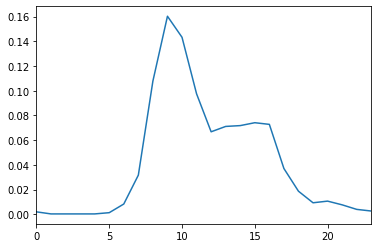

In [152]:
cream_percents.plot();

In [0]:

froyo_percents = froyo['order_hour_of_day'].value_counts(normalize=True).sort_index()

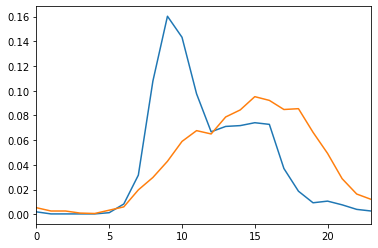

In [156]:
cream_percents.plot()
froyo_percents.plot();


In [0]:
mycrosstab=pd.crosstab(froyo_cream['order_hour_of_day'],froyo['product_name'],normalize='columns')

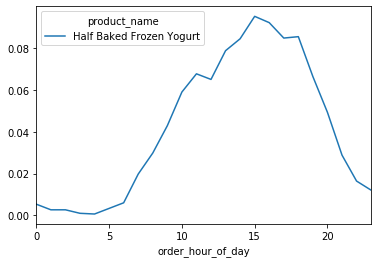

In [159]:
mycrosstab.plot();


In [163]:
# pivot table
mypivot=froyo_cream.pivot_table(index='order_hour_of_day',columns='product_name',values='order_id',aggfunc=len)
mypivot

product_name,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt
order_hour_of_day,,
0,6.0,16.0
1,1.0,8.0
2,1.0,8.0
3,NaN,3.0
4,1.0,2.0
5,4.0,10.0
6,25.0,18.0
7,95.0,59.0
8,323.0,89.0


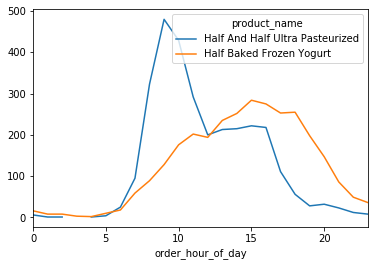

In [164]:
mypivot.plot();

In [0]:
# melt
columns={
     'order_hour_of_day': 'Hour of Day Ordered', 
     'product_name': 'Product', 
     'value': 'Percent of Orders by Product'
 }


In [169]:
# wide to tidy
tidy_table=mycrosstab.reset_index().melt(id_vars='order_hour_of_day').rename(columns=columns)
tidy_table

,Hour of Day Ordered,Product,Percent of Orders by Product
0,0,Half Baked Frozen Yogurt,0.005364
1,1,Half Baked Frozen Yogurt,0.002682
2,2,Half Baked Frozen Yogurt,0.002682
3,3,Half Baked Frozen Yogurt,0.001006
4,4,Half Baked Frozen Yogurt,0.000670
5,5,Half Baked Frozen Yogurt,0.003352
6,6,Half Baked Frozen Yogurt,0.006034
7,7,Half Baked Frozen Yogurt,0.019779
8,8,Half Baked Frozen Yogurt,0.029836
9,9,Half Baked Frozen Yogurt,0.042910


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####